In [2]:
!pip install gmaps

  Using cached gmaps-0.1.6.tar.gz
    Complete output from command python setup.py egg_info:
    /home/ubuntu/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
      "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
    /home/ubuntu/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
      warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
    Traceback (most recent call last):
      File "<string>", line 20, in <module>
      File "/tmp/pip-build-R6mD6t/gmaps/setup.py", line 7, in <module>
        import gmaps
      File "gmaps/__init__.py", line 3, in <module>
        from heatmap import heatmap
      File "gmaps/heatmap.py", line 8, in <module>
        class HeatmapWidget(widgets.DOMWidget)

In [1]:
import gmaps
data = gmaps.datasets.load_dataset('taxi_rides')
map = gmaps.heatmap(data)
gmaps.display(map)

ImportError: No module named gmaps

In [77]:
# -*- coding: utf-8 -*-
"""
Highmaps Demos
Drilldown: http://www.highcharts.com/maps/demo/map-drilldown
"""

from highcharts import Highmap
from highcharts.highmaps.highmap_helper  import jsonp_loader, js_map_loader, geojson_handler

H = Highmap()
H.add_CSSsource('http://netdna.bootstrapcdn.com/font-awesome/3.2.1/css/font-awesome.css')

"""
This example is to show how to generate drilldown map with both state and county level data in the US 
without using the JS functions as shown in Highmaps Demos

The drilldown data can be added using add_drilldown_data_set method:
add_drilldown_data_set(data, series_type, id, **kwargs)
1. data is the dataset for drilldown level
2. series_type is the type of plot presented at the drilldown level
3. id is the identifier used for the drilldown parent point to identify its series. 
    This needs to be consistent with the drilldown property in dataset of parent level 
4. kwargs are for parameters in series or plotOptions 
    (for detail please ref to highcharts API: http://api.highcharts.com/highcharts#)

However, the tradeoff is that user needs to query and handle the whole dataset in python environment
and put the whole dataset into the .html file, which could make final file very big.
"""

map_url = 'http://code.highcharts.com/mapdata/countries/us/us-all.js'
geojson = js_map_loader(map_url)
data = geojson_handler(geojson)

for i, item in enumerate(data):
    item.update({'drilldown':item['properties']['hc-key']})
    item.update({'value': i}) # add bogus data

options = {
    'chart' : {
        'events': { # Here event option is only used to change the tittle when different level data is shown
            'drilldown': "function(e){\
                            this.setTitle({ text: e.point.name }, null)\
                                    }",
            'drillup': "function () {\
                            this.setTitle({ text: 'USA' }, null);\
                                    }",
        }
    },

    'title' : {
        'text' : 'USA'
    },

    'legend': {} if H.options['chart'].__dict__.get('width', 0) < 400 else { 
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'middle'
    },

    'colorAxis': {
        'min': 0,
        'minColor': '#E6E7E8',
        'maxColor': '#006089'
    },

    'mapNavigation': {
        'enabled': True,
        'buttonOptions': {
            'verticalAlign': 'bottom'
        }
    },

    'plotOptions': {
        'map': {
            'states': {
                'hover': {
                    'color': '#EEDD66'
                }
            }
        }
    },
    'drilldown': {
        'activeDataLabelStyle': {
            'color': '#FFFFFF',
            'textDecoration': 'none',
            'textShadow': '0 0 3px #000000'
        },
        'drillUpButton': {
            'relativeTo': 'spacingBox',
            'position': {
                'x': 0,
                'y': 60
            }
        }
    }
    
}

H.add_data_set(data,'map','USA',dataLabels = {
                'enabled': True,
                'format': '{point.properties.postal-code}'
            }) 
H.set_dict_options(options)

for item in data: # add drilldown dataset
    mapkey = item['drilldown']
    url = 'http://code.highcharts.com/mapdata/countries/us/' + mapkey + '-all.js'
    sub_geojson = js_map_loader(url)
    sub_data = geojson_handler(sub_geojson)
    for i, d in enumerate(sub_data):
        d.update({'value': i}) # add bogus data
    
    H.add_drilldown_data_set(sub_data, 'map', id = mapkey, name = item['name'], 
                dataLabels = {
                    'enabled': True,
                    'format': '{point.name}'
                }
            )

x = H.htmlcontent

In [79]:
text_file = open("Output.html", "w")

text_file.write(x)

text_file.close()

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ls Data\ for\ Diploams_Unmerged\ Data

ALL_DATA_SCHEMA_UM.pdf*  Graduation_Rates.csv*
Census_Data_2010.csv*    Max_Tract_Overlap.csv*


In [3]:
from pandas.tools.plotting import boxplot_frame_groupby

In [11]:
df.columns[0:50]

Index([u'Unnamed: 0', u'leaid11', u'STNAM', u'FIPST', u'leanm11',
       u'ALL_COHORT_1112', u'ALL_RATE_1112', u'MAM_COHORT_1112',
       u'MAM_RATE_1112', u'MAS_COHORT_1112', u'MAS_RATE_1112',
       u'MBL_COHORT_1112', u'MBL_RATE_1112', u'MHI_COHORT_1112',
       u'MHI_RATE_1112', u'MTR_COHORT_1112', u'MTR_RATE_1112',
       u'MWH_COHORT_1112', u'MWH_RATE_1112', u'CWD_COHORT_1112',
       u'CWD_RATE_1112', u'ECD_COHORT_1112', u'ECD_RATE_1112',
       u'LEP_COHORT_1112', u'Percentage', u'State', u'County', u'Tract.Code',
       u'School.District', u'District.ID', u'GIDTR', u'State.1', u'State_name',
       u'County.1', u'County_name', u'Tract', u'Flag', u'Num_BGs_in_Tract',
       u'LAND_AREA', u'AIAN_LAND', u'URBANIZED_AREA_POP_CEN_2010',
       u'URBAN_CLUSTER_POP_CEN_2010', u'RURAL_POP_CEN_2010',
       u'Tot_Population_CEN_2010', u'Tot_Population_ACS_08_12',
       u'Tot_Population_ACSMOE_08_12', u'Males_CEN_2010', u'Males_ACS_08_12',
       u'Males_ACSMOE_08_12', u'Females_CEN_20

In [18]:

df = pd.read_csv("GRADUATION_WITH_CENSUS.csv")
df[["leaid11","leanm11","STNAM","County","Tract.Code",u'GIDTR',u'FIPST',u'Tract',u'State.1','District.ID']].head()


,leaid11,leanm11,STNAM,County,Tract.Code,GIDTR,FIPST,Tract,State.1,District.ID
0,100005,Albertville City,ALABAMA,95,30903,1095030903,1,30903,1,5
1,100006,Marshall County,ALABAMA,95,31000,1095031000,1,31000,1,6
2,100007,Hoover City,ALABAMA,73,14412,1073014412,1,14412,1,7
3,100008,Madison City,ALABAMA,89,11021,1089011021,1,11021,1,8
4,100011,Leeds City,ALABAMA,73,11002,1073011002,1,11002,1,11


In [89]:
x = pd.read_csv("./Merged Data/")
x[500:700]

,Unnamed: 0,leaid11,STNAM,FIPST,leanm11,ALL_COHORT_1112,ALL_RATE_1112,MAM_COHORT_1112,MAM_RATE_1112,MAS_COHORT_1112,...,pct_TEA_MailOutMailBack_CEN_2010,pct_TEA_Update_Leave_CEN_2010,pct_Census_Mail_Returns_CEN_2010,pct_Vacant_CEN_2010,pct_Deletes_CEN_2010,pct_Census_UAA_CEN_2010,pct_Mailback_Count_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_RPLCMNT_FRMS_CEN_2010,pct_BILQ_Mailout_count_CEN_2010
500,501,512480,ARKANSAS,5,SLOAN-HENDRIX SCHOOL DIST.,56,84.5,NaN,NaN,NaN,...,14.99,85.01,57.49,18.21,4.52,5.32,71.95,56.78,0.72,0.00
501,502,512510,ARKANSAS,5,SMACKOVER SCHOOL DISTRICT,73,92.0,NaN,NaN,4,...,7.76,92.24,64.60,12.21,2.79,0.52,84.48,64.17,0.44,0.00
502,503,512520,ARKANSAS,5,SO. CONWAY CO. SCHOOL DISTRICT,191,82.0,2,PS,5,...,100.00,0.00,63.37,3.62,0.00,14.21,82.17,63.37,0.00,0.00
503,504,512540,ARKANSAS,5,SOUTHSIDE SCHOOL DISTRICT,109,92.0,NaN,NaN,3,...,85.85,14.15,65.43,11.67,0.40,4.87,83.06,59.99,5.44,0.00
504,505,512570,ARKANSAS,5,SOUTH SIDE SCHOOL DISTRICT,46,84.5,1,PS,NaN,...,19.11,80.89,53.15,22.54,3.01,4.52,69.94,52.28,0.87,0.00
505,506,512630,ARKANSAS,5,SPRING HILL SCHOOL DISTRICT,48,90.0,NaN,NaN,1,...,87.11,12.89,60.96,9.20,0.88,10.85,79.07,60.96,0.00,0.00
506,507,512660,ARKANSAS,5,SPRINGDALE SCHOOL DISTRICT,1251,82.0,4,PS,111,...,88.32,11.68,63.39,5.56,0.79,16.28,77.37,58.62,4.77,0.00
507,508,512870,ARKANSAS,5,STEPHENS SCHOOL DISTRICT,28,69.5,NaN,NaN,NaN,...,13.12,86.88,53.27,20.32,4.47,2.03,73.18,52.74,0.53,0.00
508,509,512930,ARKANSAS,5,STRONG-HUTTIG SCHOOL DISTRICT,57,90.0,1,PS,NaN,...,11.02,88.98,45.26,26.13,4.95,3.16,65.76,44.73,0.53,0.00
509,510,512960,ARKANSAS,5,STUTTGART SCHOOL DISTRICT,156,82.0,1,PS,1,...,0.00,100.00,64.41,11.51,0.74,0.00,87.75,64.41,0.00,0.00


In [50]:
districts_merged = pd.read_csv("./Data for Diploams_Unmerged Data/")
districts_merged.head()

ValueError: No columns to parse from file

In [4]:
##### 1) READ IN DISTRICTS DATA AND CLEAN UP DEPENDENT VARIABLES

# A. read and index data
districts_unmerged = pd.read_csv("Data for Diploams_Unmerged Data/Graduation_Rates.csv")
districts_unmerged.shape
districts_unmerged_indexed_by_leaid = districts_unmerged.set_index("leaid11", verify_integrity = True)

# B. clean up dependent variable
#read in merged dataset with clean dependent vars
districts_merged = pd.read_csv("Merged Data/GRADUATION_WITH_CENSUS.csv")
districts_merged_indexed_by_leaid = districts_merged.set_index("leaid11", verify_integrity = True)


#rename dependent var col -- important for concat
new_col = districts_merged_indexed_by_leaid.columns.values
new_col[5] = "clean_grad_rate" 
districts_merged_indexed_by_leaid.columns = new_col

# concat clean grad rates with districts DF
#need to change this to a merge...
clean_grad_rates = districts_merged_indexed_by_leaid.clean_grad_rate
districts_clean = districts_unmerged_indexed_by_leaid.merge(pd.DataFrame(clean_grad_rates), left_index = True, right_index = True, how = "left")


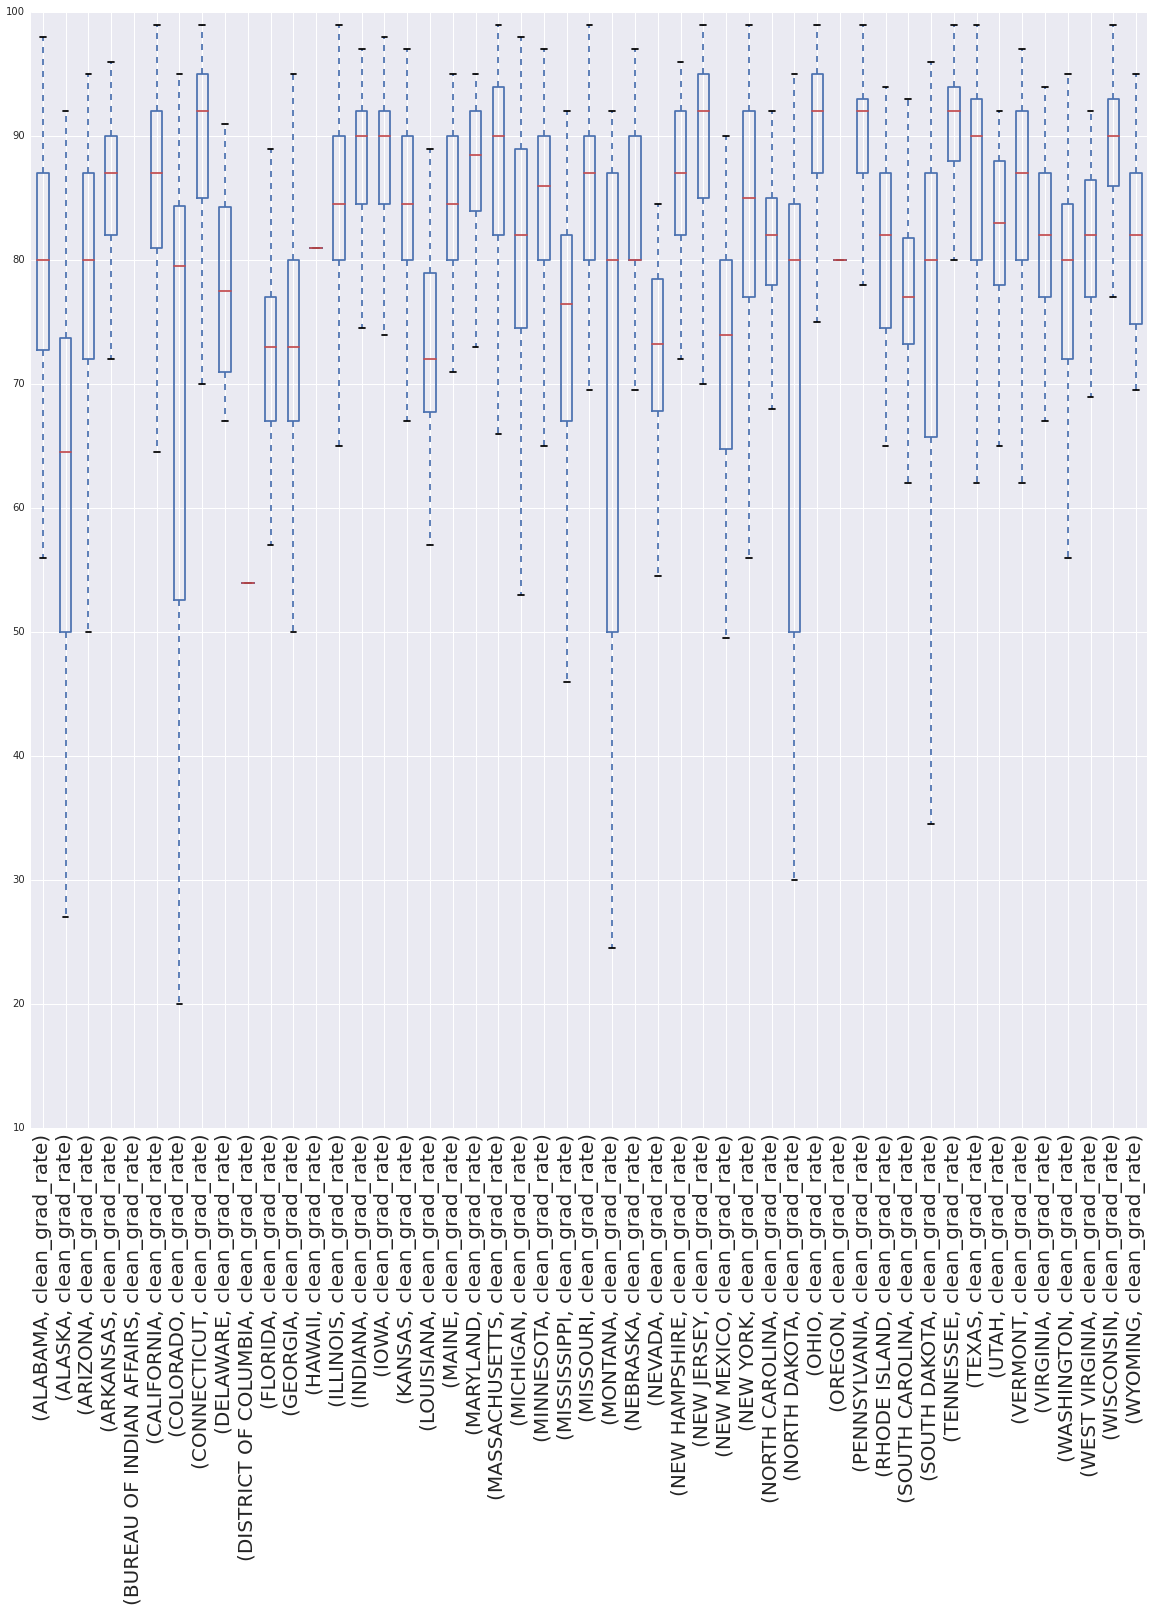

In [17]:
pylab.rcParams['figure.figsize'] = (20.0, 20.0)
ax = districts_clean[["STNAM","clean_grad_rate"]].groupby("STNAM").boxplot(figsize=(2,2),rot=90,subplots=False,fontsize=20)


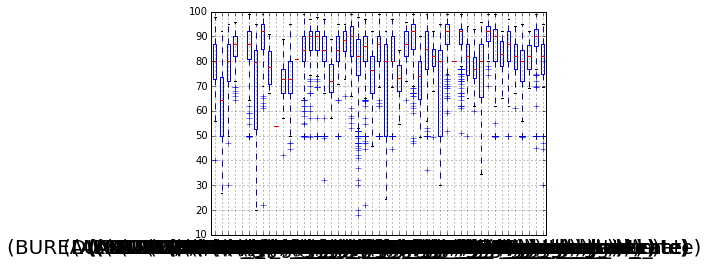

In [45]:
from matplotlib.backends.backend_pdf import PdfPages
ax = districts_clean[["STNAM","clean_grad_rate"]].groupby("STNAM").boxplot(figsize=(50,50),subplots=False,fontsize=20)

# pp = PdfPages('multipage.pdf')
# plt.savefig(pp, format='pdf')
# pp.close()

In [41]:
plt.show()

In [23]:
districts_clean[["STNAM","clean_grad_rate"]].plot(kind='box')

ValueError: Invalid chart type given box

In [65]:

districts_unmerged

,STNAM,FIPST,leaid11,leanm11,ALL_COHORT_1112,ALL_RATE_1112,MAM_COHORT_1112,MAM_RATE_1112,MAS_COHORT_1112,MAS_RATE_1112,...,MTR_COHORT_1112,MTR_RATE_1112,MWH_COHORT_1112,MWH_RATE_1112,CWD_COHORT_1112,CWD_RATE_1112,ECD_COHORT_1112,ECD_RATE_1112,LEP_COHORT_1112,LEP_RATE_1112
0,ALABAMA,1,100005,Albertville City,268,83,NaN,NaN,NaN,NaN,...,NaN,NaN,213,85-89,18,60-79,107,70-74,9,LT50
1,ALABAMA,1,100006,Marshall County,424,79,2,PS,1,PS,...,NaN,NaN,391,79,66,70-74,250,70-74,9,LT50
2,ALABAMA,1,100007,Hoover City,1042,91,1,PS,71,85-89,...,5,PS,688,94,63,70-74,216,75-79,21,21-39
3,ALABAMA,1,100008,Madison City,836,91,4,PS,44,GE90,...,2,PS,566,93,72,60-64,163,80-84,7,GE50
4,ALABAMA,1,100011,Leeds City,117,70-74,NaN,NaN,NaN,NaN,...,NaN,NaN,62,75-79,18,60-79,83,65-69,3,PS
5,ALABAMA,1,100012,Boaz City,155,90-94,NaN,NaN,3,PS,...,1,PS,133,90-94,14,GE50,68,85-89,1,PS
6,ALABAMA,1,100013,Trussville City,300,93,1,PS,2,PS,...,NaN,NaN,261,90-94,20,40-59,45,80-89,4,PS
7,ALABAMA,1,100030,Alexander City,289,78,1,PS,4,PS,...,NaN,NaN,166,80-84,43,60-69,139,70-74,2,PS
8,ALABAMA,1,100060,Andalusia City,109,75-79,NaN,NaN,1,PS,...,NaN,NaN,61,80-84,3,PS,52,60-69,1,PS
9,ALABAMA,1,100090,Anniston City,207,65,NaN,NaN,NaN,NaN,...,NaN,NaN,4,PS,25,40-59,181,65-69,NaN,NaN


In [32]:
districts_clean[["STNAM","clean_grad_rate"]].groupby("STNAM").mean().sort(columns="clean_grad_rate",ascending=False)

,clean_grad_rate
STNAM,
TENNESSEE,90.281513
OHIO,90.100985
PENNSYLVANIA,89.073589
WISCONSIN,88.420424
NEW JERSEY,88.253788
CONNECTICUT,88.053719
INDIANA,87.731034
MASSACHUSETTS,87.437500
MARYLAND,86.916667


In [11]:
districts_clean[["STNAM","clean_grad_rate"]].groupby("STNAM").mean().sort(columns="clean_grad_rate",ascending=False)

,clean_grad_rate
STNAM,
TENNESSEE,90.281513
OHIO,90.100985
PENNSYLVANIA,89.073589
WISCONSIN,88.420424
NEW JERSEY,88.253788
CONNECTICUT,88.053719
INDIANA,87.731034
MASSACHUSETTS,87.437500
MARYLAND,86.916667


In [ ]:
##### 2) READ IN OTHER DATASETS, MERGE TRACT DATA WITH DISTRICT CODES, CREATE WEIGHTED VALUES
# A. read in other datasets and merge tract data with district codes
tracts = pd.read_csv("Data for Diploams_Unmerged Data/Census_Data_2010.csv")
overlap = pd.read_csv("Data for Diploams_Unmerged Data/Max_Tract_Overlap.csv")
overlap_limited = overlap[["Percentage", "State", "County", "Tract Code", " School District", " District ID", "Leaid"]]
overlap_tracts_merge = overlap_limited.merge(tracts, how="left", left_on = "Tract Code", right_on = "Tract")

# B. drop MOE and pct and avg columns -- MOEs not needed, pct/avg cols will need to be recalculated after aggregating
overlap_tracts_merge.shape

for col in overlap_tracts_merge.columns:
    if "MOE" in col or "avg" in col or "pct" in col:
        overlap_tracts_merge.drop(col, axis = 1, inplace = True)

overlap_tracts_merge.shape

# C. get weighted values

def turn_dollars_into_float(x):
    if pd.notnull(x):
        return float(x.replace("$", "").replace(",",""))
    else:
        return x
        
def fix_data_if_object_dtype(col):
    if overlap_tracts_merge[col].dtype == "object":
        overlap_tracts_merge[col] = overlap_tracts_merge[col].apply(lambda x: turn_dollars_into_float(x))

def create_new_weighted_column(col):
    weighted_col_name = "weighted_" + col
    weighted_col_value = overlap_tracts_merge.Percentage * overlap_tracts_merge[col]
    overlap_tracts_merge[weighted_col_name] = weighted_col_value

for col in overlap_tracts_merge.columns[17:]:
    #ignore median income/value columns because they can't be calculated like this
    if "Med" not in col:
        fix_data_if_object_dtype(col)
        create_new_weighted_column(col)

#also, convert dollar data into float data
overlap_tracts_merge.Med_HHD_Inc_ACS_08_12 = overlap_tracts_merge.Med_HHD_Inc_ACS_08_12.apply(turn_dollars_into_float)
overlap_tracts_merge.Med_House_value_ACS_08_12 = overlap_tracts_merge.Med_House_value_ACS_08_12.apply(turn_dollars_into_float)



In [ ]:
##### 3) START AGGREGATING AND MERGING DATA

# A. merge absolute data
def merge_column_into_districts_from_tract_data(col_name, df):
    aggregated_series = overlap_tracts_merge.groupby("Leaid")[col_name].sum()
    new_df = df.merge(pd.DataFrame(aggregated_series), left_index = True, right_index = True, how = "left")
    return new_df

for col in overlap_tracts_merge.columns:
    if "weighted_" in col:
        districts_clean = merge_column_into_districts_from_tract_data(col, districts_clean)

districts_clean
districts_clean.columns
districts_clean.shape


In [ ]:
# B. merge median value data
districts_clean["weighted_Med_HHD_Inc_ACS_08_12"] = np.NaN * len(districts_clean)
districts_clean["weighted_Med_House_value_ACS_08_12"] = np.NaN * len(districts_clean)


for i in districts_clean.index:
    tracts = overlap_tracts_merge[overlap_tracts_merge.Leaid == i]
    total_HH = districts_clean.loc[i].weighted_Tot_Housing_Units_ACS_08_12
    
    med_income = sum(tracts.Med_HHD_Inc_ACS_08_12 *(tracts.weighted_Tot_Housing_Units_ACS_08_12 / total_HH))
    med_value = sum(tracts.Med_House_value_ACS_08_12 *(tracts.weighted_Tot_Housing_Units_ACS_08_12 / total_HH))
    
    districts_clean.loc[i]["weighted_Med_HHD_Inc_ACS_08_12"] = med_income
    districts_clean.loc[i]["weighted_Med_House_value_ACS_08_12"] = med_value


In [34]:
districts_clean.weighted_Med_House_value_ACS_08_12

AttributeError: 'DataFrame' object has no attribute 'weighted_Med_House_value_ACS_08_12'

In [36]:
cd data


/home/ubuntu/DataForDiploma/data


In [37]:
ls

merged_and_weighted_data.csv


In [38]:
merged_weighted = pd.read_csv("./merged_and_weighted_data.csv")

In [39]:
merged_weighted.head()

,leaid11,STNAM,FIPST,leanm11,ALL_COHORT_1112,ALL_RATE_1112,MAM_COHORT_1112,MAM_RATE_1112,MAS_COHORT_1112,MAS_RATE_1112,...,weighted_Census_UAA_CEN_2010,weighted_Valid_Mailback_Count_CEN_2010,weighted_FRST_FRMS_CEN_2010,weighted_RPLCMNT_FRMS_CEN_2010,weighted_BILQ_Mailout_count_CEN_2010,weighted_BILQ_Frms_CEN_2010,weighted_Mail_Return_Rate_CEN_2010,weighted_Low_Response_Score,weighted_Med_HHD_Inc_ACS_08_12,weighted_Med_House_value_ACS_08_12
0,100005,ALABAMA,1,Albertville City,268,83,NaN,NaN,NaN,NaN,...,165084.811127,1440625.73196,1027194.380350,83081.898410,192149.368942,100345.669509,68560.549283,17005.678663,52403.126595,236467.801609
1,100006,ALABAMA,1,Marshall County,424,79,2,PS,1,PS,...,1012100.000000,5830900.00000,4414500.000000,240500.000000,354900.000000,197400.000000,293020.000000,75635.051718,50452.330807,187524.525585
2,100007,ALABAMA,1,Hoover City,1042,91,1,PS,71,85-89,...,55746.129084,706317.44198,568150.960755,22977.795142,0.000000,0.000000,25095.748434,4692.928111,80218.769456,224382.388098
3,100008,ALABAMA,1,Madison City,836,91,4,PS,44,GE90,...,22800.000000,475700.00000,374700.000000,17100.000000,0.000000,0.000000,24720.000000,5378.850612,69663.940110,161909.408653
4,100011,ALABAMA,1,Leeds City,117,70-74,NaN,NaN,NaN,NaN,...,1005700.000000,6164600.00000,4935300.000000,171200.000000,0.000000,0.000000,314550.000000,70156.551634,57125.499981,220249.112071


In [68]:
from jinja2 import Environment

HTML = """

<!DOCTYPE html>
<html>
<head>
  <meta http-equiv="content-type" content="text/html; charset=UTF-8">
  <title>Javascript example - jsFiddle demo by blazeeboy</title>
  
  
  <script type='text/javascript' src='/js/lib/mootools-core-1.4.5-nocompat.js'></script>
  
  
  
  
  <link rel="stylesheet" type="text/css" href="/css/result-light.css">
  
  <style type='text/css'>
    
  </style>
  



<script type='text/javascript'>//<![CDATA[

function change(){
    
   var myNewTitle = document.getElementById('myTextField').value;
   if( myNewTitle.length==0 ){
       alert('Write Some real Text please.');
   return;
   }
   
   var title = document.getElementById('title');
   title.innerHTML = myNewTitle;
    
}
//]]> 

</script>

</head>
<body>
  <h1 id="title">Javascript example no.2</h1>
<input type="text" id="myTextField"/>
<input type="submit" id="byBtn" value="Change" onclick="change()"/>
  
</body>

</html>


"""

def print_html_doc():
    return Environment().from_string(HTML).render(title='Hellow Gist from GutHub')

if __name__ == '__main__':
    x = print_html_doc()

In [75]:
from IPython.core.display import HTML
HTML(x)

In [37]:
import jinja2

In [38]:
jinja2.

SyntaxError: invalid syntax (<ipython-input-38-9473fd008ca4>, line 1)

In [39]:
from IPython.core.display import HTML
HTML(x)

In [80]:
import charts
# Check OUT HIGH CHARTS

In [58]:
data = [1,2,5,9,6,3,4,8]
options = dict(height=400, title=dict(text='My first chart!'))
charts.plot(data, options=options, name='List data', save='temp.svg', show='inline')

In [60]:
from highcharts import Highchart
H = Highchart(width=550, height=400)

options = {
    'chart': {
        'type': 'boxplot'
    },
    'title': {
        'text': 'Highcharts Box Plot Example'
    },
    'legend': {
        'enabled': False
    },
    'xAxis': {
        'categories': ['1', '2', '3', '4', '5'],
        'title': {
            'text': 'Experiment No.'
        }
    },

    'yAxis': {
        'title': {
            'text': 'Observations'
        },
        'plotLines': [{
            'value': 932,
            'color': 'red',
            'width': 1,
            'label': {
                'text': 'Theoretical mean: 932',
                'align': 'center',
                'style': {
                    'color': 'gray'
                }
            }
        }]
    },
}

data =[
    [760, 801, 848, 895, 965],
    [733, 853, 939, 980, 1080],
    [714, 762, 817, 870, 918],
    [724, 802, 806, 871, 950],
    [834, 836, 864, 882, 910]
]
data_outline = [[0, 644],
                [4, 718],
                [4, 951],
                [4, 969]]

H.set_dict_options(options)
H.add_data_set(data, 'boxplot', 'Observations', tooltip = {
                'headerFormat': '<em>Experiment No {point.key}</em><br/>'})
H.add_data_set(data_outline, 'scatter', 'Outlier', marker = {
                'fillColor': 'white',
                'lineWidth': 1,
                'lineColor': 'Highcharts.getOptions().colors[0]'
            },
            tooltip = {
                'pointFormat': 'Observation: {point.y}'
            })

H.htmlcontent

ImportError: No module named highcharts

In [45]:
from jinja2 import Template

t = Template("Hello {{ something }}!")
t.render(something="World")

u'Hello World!'

In [46]:
print t.render(something="World")

Hello World!


In [47]:
import tempfile

In [53]:
26.0/130.0

0.2

In [54]:
130/26.0

5.0

In [ ]:
###  MERGE FILE STARTS HERE

import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression 
import statsmodels.formula.api as sm
from statsmodels.tools.tools import add_constant

districts_unmerged = pd.read_csv("unmerged/Graduation_Rates.csv")
districts_unmerged.shape


In [20]:

##### 1) READ IN DISTRICTS DATA AND CLEAN UP DEPENDENT VARIABLES

# A. read and index data
districts_unmerged = pd.read_csv("unmerged/Graduation_Rates.csv")
districts_unmerged.shape


IOError: File unmerged/Graduation_Rates.csv does not exist

In [ ]:
# B. clean up dependent variable
'''
The dependent variable in the unmerged district dataset is pretty messy because there 
are ranges, letters, etc. in them. So what I've done is taken the dependent variables in the
merged dataset, which have been cleaned, and added them to the unmerged district dataset. Note
that the unmerged district dataset and the merged one are not very different in terms of 
which districts are included. The merged one is just different because it includes data
for the maximum overlapping tract.
'''

# Clean up grad rate (dependent variables)
districts_unmerged.ALL_RATE_1112

#first get rid of all observations with no grad rate given. They all have PS as the ALL_RATE_1112
sum(districts_unmerged.ALL_RATE_1112 == "PS") #197

no_grad_rate = districts_unmerged.index[districts_unmerged.ALL_RATE_1112 == "PS"]

districts_unmerged.drop(no_grad_rate, inplace = True)

'''
Next, we need to make grad rates numeric. There are a few different types of values 
in the ALL_RATE_1112 column (the grad rate column). First, is just a number, which
is what we want. The others are ranges. The government provided ranges instead of
actual numbers because of privacy concerns. 

What we do is we get the median of any grad rate that is provided as a range. 
There are three different types of ranges. First, you have something like 60-64,
which is simple to parse.

The other two ranges look something like GE50 or LE50. They mean that the 
range is greater than/less than that number. Depending on whether it is greater
than or less than, I assigned the different floor/ceiling as 100 or 0, and then 
calculated the median of that range.

'''
districts_unmerged.ALL_RATE_1112


def get_median_grad_rate_in_range(grad_rate):
    no_hyphen = grad_rate.replace("-", "")
    half_length = len(no_hyphen) / 2

    first_number = int(no_hyphen[0:half_length])
    second_number = int(no_hyphen[half_length:])
    median = np.median([first_number, second_number])
    
    return median


def get_number_string_from_grad_rate_range(grad_rate):
    split_rate = list(grad_rate)
    digits = []
    
    for c in split_rate:
        try:
            int(c)
            digits.append(c)
        except:
            next
        
    grad_rate_string = "".join(digits)
    
    return grad_rate_string


def get_grad_rate_range(grad_rate):
    if "GE" in grad_rate:
        grad_rate_floor = get_number_string_from_grad_rate_range(grad_rate)
        grad_rate_ceiling = "100"
        
        grad_rate_range = grad_rate_floor + "-" + grad_rate_ceiling
    else:
        grad_rate_ceiling = get_number_string_from_grad_rate_range(grad_rate)
        grad_rate_floor = "0"
        
        grad_rate_range = grad_rate_floor + "-" + grad_rate_ceiling
    
    return grad_rate_range


def fix_grad_rate(grad_rate):
    try:
        clean_grad_rate = int(grad_rate)
    except:
        if "-" in grad_rate:
            clean_grad_rate = get_median_grad_rate_in_range(grad_rate)
        else:
            grad_rate_range = get_grad_rate_range(grad_rate)
            clean_grad_rate = get_median_grad_rate_in_range(grad_rate_range)
    
    return clean_grad_rate
    

districts_unmerged.ALL_RATE_1112.apply(fix_grad_rate)

districts_unmerged["clean_grad_rate"] = districts_unmerged.ALL_RATE_1112.apply(fix_grad_rate).astype(float)
districts_unmerged[["clean_grad_rate", "ALL_RATE_1112"]]
districts_unmerged.clean_grad_rate.describe()



In [ ]:
##### 2) READ IN OTHER DATASETS, MERGE TRACT DATA WITH DISTRICT CODES, CREATE WEIGHTED VALUES
# A. read in other datasets and merge tract data with district codes
tracts = pd.read_csv("unmerged/Census_Data_2010.csv")
overlap = pd.read_csv("unmerged/SD_TRACT_MAPPING2010.csv") #this dataset maps tracts with districts, and includes the percentage overlap

# Time to merge tracts and overlap!

overlap.columns
tracts.columns

overlap.State
overlap.County
overlap["Tract Code"]

overlap_merge_columns = ["State", "County", "Tract Code"]

tracts.State
tracts.County
tracts.Tract

tract_merge_columns = ["State", "County", "Tract"]

overlap_tracts_merge = overlap.merge(tracts, left_on = overlap_merge_columns, right_on = tract_merge_columns, how = "inner")

overlap_tracts_merge.shape
overlap_tracts_merge.Percentage.describe()


'''
Here, I drop the margin of error (MOE) and calculated percentage columns.
The MOEs are not needed, and the calculated percentage cols will need to 
be recalculated after weighting and aggregating.
'''


for col in overlap_tracts_merge.columns:
    if "MOE" in col or "avg" in col or "pct" in col:
        overlap_tracts_merge.drop(col, axis = 1, inplace = True)

overlap_tracts_merge.shape

# C. Get weighted values using the tract-district overlap percentages

#This function is needed to convert some of the columns which are strings to floats
def turn_dollars_into_float(x):
    if pd.notnull(x):
        return float(x.replace("$", "").replace(",",""))
    else:
        return x
        
def fix_data_if_object_dtype(col):
    if overlap_tracts_merge[col].dtype == "object":
        overlap_tracts_merge[col] = overlap_tracts_merge[col].apply(lambda x: turn_dollars_into_float(x))

def create_new_weighted_column(col):
    weighted_col_name = "weighted_" + col
    weighted_col_value = (overlap_tracts_merge.Percentage / 100) * overlap_tracts_merge[col]
    overlap_tracts_merge[weighted_col_name] = weighted_col_value

# For all the columns that we need, I create weighted values for them based on the overlap percentages
for col in overlap_tracts_merge.columns[15:]:
    fix_data_if_object_dtype(col) #this will turn all dollar values in string format into floats

    #ignore median income/value columns because they can't be calculated like this
    if "Med" not in col:
        create_new_weighted_column(col)

#make sure merge look generally accurate
overlap_tracts_merge.columns
overlap_tracts_merge.shape
overlap_tracts_merge.Percentage.head()
tracts.Tot_Population_CEN_2010.sum()
overlap_tracts_merge.Tot_Population_CEN_2010.sum()
overlap_tracts_merge.weighted_Tot_Population_CEN_2010.sum()



In [ ]:
##### 3) START AGGREGATING AND MERGING DATA
districts_unmerged.columns
districts_unmerged.shape
districts_unmerged.leaid11

# This function will take a weighted column, group and sum up by district IDs, and merge it onto the districts dataset
def merge_column_into_districts_from_tract_data(col_name, districts_df):
    aggregated_series = overlap_tracts_merge.groupby("Leaid")[col_name].sum()
    new_df = districts_df.merge(pd.DataFrame(aggregated_series), left_on = "leaid11", right_index = True, how = "inner")
    return new_df

# This loop applies the function above to all the columns in the overlap dataset with weighted values 
for col in overlap_tracts_merge.columns:
    if "weighted_" in col:
        districts_unmerged = merge_column_into_districts_from_tract_data(col, districts_unmerged)


districts_unmerged
districts_unmerged.columns
districts_unmerged.shape

districts_merged = districts_unmerged.set_index("leaid11")

districts_merged.weighted_Tot_Housing_Units_CEN_2010

districts_merged.weighted_Tot_Population_CEN_2010.sum()


# This for loops correctly calculates median values because we can't calculate them merely by multiplying by percentage overlaps
for i in districts_merged.index:
    tracts = overlap_tracts_merge[overlap_tracts_merge.Leaid == i]
    total_HH = districts_merged.loc[i].weighted_Tot_Occp_Units_ACS_08_12
    
    med_income_list = tracts.Med_HHD_Inc_ACS_08_12 * (tracts.weighted_Tot_Occp_Units_ACS_08_12 / total_HH)
    med_value_list = tracts.Med_House_value_ACS_08_12 * (tracts.weighted_Tot_Occp_Units_ACS_08_12 / total_HH)
    
    med_income = sum(med_income_list[med_income_list.notnull()])   
    med_value = sum(med_value_list[med_value_list.notnull()])
    
    districts_merged.loc[i, "weighted_Med_HHD_Inc_ACS_08_12"] = med_income
    districts_merged.loc[i, "weighted_Med_House_value_ACS_08_12"] = med_value
    

districts_merged["weighted_Med_House_value_ACS_08_12"].describe()
districts_merged["weighted_Med_HHD_Inc_ACS_08_12"].describe()
districts_merged.shape

# WRITE MERGED CSV
districts_merged.to_csv("merged_and_weighted_data.csv")


In [ ]:
### ANALYSIS SCRIPT STARTS HERE

grad_rates = pd.read_csv("merged_and_weighted_data.csv")
grad_rates.clean_grad_rate.describe()
grad_rates.columns


In [ ]:

'''PART A) FEATURE ENGINEERING '''
#1) create dummy variables for States

grad_rates.STNAM = grad_rates.STNAM.astype("category")
state_dummies = pd.get_dummies(grad_rates.STNAM, prefix = "stnam")
state_dummies.iloc[:,1:] 
state_dummies = state_dummies.iloc[:,1:] #remove one of the dummies (Alabama)
len(state_dummies.columns)
grad_rates = pd.concat([grad_rates, state_dummies], axis = 1)

state_dummies = [col for col in grad_rates.columns if "stnam" in col]

# 2) create variables for graduating cohort populations 

for col in grad_rates.columns:
    if "COHORT" in col:
        grad_rates[col] = grad_rates[col].fillna(0)

grad_rates["perc_ECD_in_cohort"] = grad_rates.ECD_COHORT_1112 * 100 / grad_rates.ALL_COHORT_1112
grad_rates["nat_amer_cohort_rate"] = (grad_rates.MAM_COHORT_1112 * 100.0) / grad_rates.ALL_COHORT_1112
grad_rates["asian_amer_cohort_rate"] = (grad_rates.MAS_COHORT_1112 * 100.0) / grad_rates.ALL_COHORT_1112
grad_rates["afr_amer_cohort_rate"] = (grad_rates.MBL_COHORT_1112 * 100.0) / grad_rates.ALL_COHORT_1112
grad_rates["hisp_cohort_rate"] = (grad_rates.MHI_COHORT_1112 * 100.0) / grad_rates.ALL_COHORT_1112
grad_rates["multirace_cohort_rate"] = (grad_rates.MTR_COHORT_1112 * 100.0) / grad_rates.ALL_COHORT_1112
grad_rates["white_cohort_rate"] = (grad_rates.MWH_COHORT_1112 * 100.0) / grad_rates.ALL_COHORT_1112
grad_rates["disability_cohort_rate"] = (grad_rates.CWD_COHORT_1112 * 100.0) / grad_rates.ALL_COHORT_1112
grad_rates["lim_eng_prof_cohort_rate"] = (grad_rates.LEP_COHORT_1112 * 100.0) / grad_rates.ALL_COHORT_1112

cohort_vars = [col for col in grad_rates.columns if "cohort" in col]

cohort_vars.append("ALL_COHORT_1112") #add cohort size var


#3) Household income and value vars

house_income_and_value_vars = ["weighted_Med_House_value_ACS_08_12",
                               "weighted_Med_HHD_Inc_ACS_08_12",
                               "weighted_Aggregate_HH_INC_ACS_08_12",
                               "weighted_Aggr_House_Value_ACS_08_12"]
                               
                               
grad_rates[house_income_and_value_vars]

# 4) Create urban population vars

grad_rates["pct_urban_pop"] = (grad_rates.weighted_URBANIZED_AREA_POP_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_urban_cluster_pop"] = (grad_rates.weighted_URBAN_CLUSTER_POP_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_rural_pop"] = (grad_rates.weighted_RURAL_POP_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Population_CEN_2010

urban_pop_cols = ["pct_urban_pop",
                  "pct_urban_cluster_pop",
                  "pct_rural_pop"]



# 5) Household vars

grad_rates["pct_occupied_HH"] = (grad_rates.weighted_Tot_Occp_Units_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Housing_Units_CEN_2010
grad_rates["pct_vacant_HH"] = (grad_rates.weighted_Tot_Vacant_Units_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Housing_Units_CEN_2010

               
occupied_vs_vacant_vars = ["pct_occupied_HH",
                           "pct_vacant_HH"]


grad_rates["pct_renter_occupied"] = (grad_rates.weighted_Renter_Occp_HU_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Occp_Units_CEN_2010
grad_rates["pct_owner_occupied"] = (grad_rates.weighted_Owner_Occp_HU_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Occp_Units_CEN_2010

renter_vs_owner_vars = ["pct_renter_occupied", 
                        "pct_owner_occupied"]
                  
grad_rates["pct_people_with_different_HH_1yr_ago"] =  (grad_rates.weighted_Diff_HU_1yr_Ago_ACS_08_12 * 100.0) / grad_rates.weighted_Pop_1yr_Over_ACS_08_12
grad_rates["pct_HHs_where_householder_moved_in_2010"] = (grad_rates.weighted_HHD_Moved_in_ACS_08_12 * 100.0) / grad_rates.weighted_Tot_Occp_Units_ACS_08_12
                 
moving_HHDs_vars = ["pct_people_with_different_HH_1yr_ago",
                    "pct_HHs_where_householder_moved_in_2010"]
                    
             
grad_rates["pct_single_unit_HH"] = (grad_rates.weighted_Single_Unit_ACS_08_12 * 100.0) / grad_rates.weighted_Tot_Housing_Units_ACS_08_12
grad_rates["pct_multi_2to9_unit_HH"] = (grad_rates.weighted_MLT_U2_9_STRC_ACS_08_12 * 100.0) / grad_rates.weighted_Tot_Housing_Units_ACS_08_12
grad_rates["pct_multi_10p_unit_HH"] = (grad_rates.weighted_MLT_U10p_ACS_08_12 * 100.0) / grad_rates.weighted_Tot_Housing_Units_ACS_08_12
grad_rates["pct_mobile_HH"] = (grad_rates.weighted_Mobile_Homes_ACS_08_12 * 100.0) / grad_rates.weighted_Tot_Housing_Units_ACS_08_12
            
unit_size_vars = ["pct_single_unit_HH",
                  "pct_multi_2to9_unit_HH",
                  "pct_multi_10p_unit_HH",
                  "pct_mobile_HH"]
                  
grad_rates["pct_crowded_occ"] = (grad_rates.weighted_Crowd_Occp_U_ACS_08_12 * 100.0) / grad_rates.weighted_Tot_Occp_Units_ACS_08_12
grad_rates["avg_occ"] = (grad_rates.weighted_Tot_Prns_in_HHD_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Occp_Units_CEN_2010

occupancy_level_vars = ["avg_occ",
                        "pct_crowded_occ"]
     
          
grad_rates["pct_female_only_HH"] = (grad_rates.weighted_Female_No_HB_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Occp_Units_CEN_2010
grad_rates["pct_married_HH"] = (grad_rates.weighted_MrdCple_Fmly_HHD_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Occp_Units_CEN_2010
grad_rates["pct_related_family_HH"] = (grad_rates.weighted_Rel_Family_HHDS_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Occp_Units_CEN_2010
grad_rates["pct_not_married_HH"] = (grad_rates.weighted_Not_MrdCple_HHD_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Occp_Units_CEN_2010
grad_rates["pct_nonfamily_HH"] = (grad_rates.weighted_NonFamily_HHD_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Occp_Units_CEN_2010
grad_rates["pct_single_person_HH"] = (grad_rates.weighted_Sngl_Prns_HHD_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Occp_Units_CEN_2010
grad_rates["pct_under18_HH"] = (grad_rates.weighted_HHD_PPL_Und_18_CEN_2010 * 100.0) / grad_rates.weighted_Tot_Occp_Units_CEN_2010
grad_rates["pct_related_under6_HH"] = (grad_rates.weighted_Rel_Child_Under_6_CEN_2010 * 100.0) / grad_rates.weighted_Rel_Family_HHDS_CEN_2010

               
household_structure_vars = ["pct_related_family_HH",
                      "pct_married_HH",
                      "pct_not_married_HH",
                      "pct_female_only_HH",
                      "pct_nonfamily_HH",
                      "pct_single_person_HH",
                      "pct_under18_HH",
                      "pct_related_under6_HH"]
                 
                 

# 6) Education vars
                      
grad_rates["pct_not_HS_grad"] = (grad_rates.weighted_Not_HS_Grad_ACS_08_12 * 100.0) / grad_rates.weighted_Pop_25yrs_Over_ACS_08_12
grad_rates["pct_college_grad"] = (grad_rates.weighted_College_ACS_08_12 * 100.0) / grad_rates.weighted_Pop_25yrs_Over_ACS_08_12

education_vars = ["pct_not_HS_grad",
                  "pct_college_grad"]
                  
# 7) Poverty/public assistance/low income indicators 
grad_rates["pct_people_below_poverty"] = (grad_rates.weighted_Prs_Blw_Pov_Lev_ACS_08_12 * 100.0) / grad_rates.weighted_Pov_Univ_ACS_08_12
grad_rates["pct_HHs_with_public_asst_income"] = (grad_rates.weighted_PUB_ASST_INC_ACS_08_12 * 100.0) / grad_rates.weighted_Tot_Occp_Units_ACS_08_12
grad_rates["pct_HHs_without_plumbing"] = (grad_rates.weighted_No_Plumb_ACS_08_12 * 100.0) / grad_rates.weighted_Tot_Housing_Units_ACS_08_12
grad_rates["pct_HHs_without_phone"] = (grad_rates.weighted_Occp_U_NO_PH_SRVC_ACS_08_12 * 100.0) / grad_rates.weighted_Tot_Occp_Units_ACS_08_12


low_income_indicator_vars = ["pct_people_below_poverty",
                             "pct_HHs_with_public_asst_income",
                             "pct_HHs_without_plumbing",
                             "pct_HHs_without_phone"]

# 8) Labor variables
grad_rates["emp_rate_16p"] = (grad_rates.weighted_Civ_emp_16plus_ACS_08_12 * 100.0) / grad_rates.weighted_Civ_labor_16plus_ACS_08_12
grad_rates["emp_rate_16_24"] = (grad_rates.weighted_Civ_emp_16_24_ACS_08_12 * 100.0) / grad_rates.weighted_Civ_labor_16_24_ACS_08_12
grad_rates["emp_rate_25_44"] = (grad_rates.weighted_Civ_emp_25_44_ACS_08_12 * 100.0) / grad_rates.weighted_Civ_labor_25_44_ACS_08_12
grad_rates["emp_rate_45_64"] = (grad_rates.weighted_Civ_emp_45_64_ACS_08_12 * 100.0) / grad_rates.weighted_Civ_labor_45_64_ACS_08_12
grad_rates["emp_rate_65p"] = (grad_rates.weighted_Civ_emp_65plus_ACS_08_12 * 100.0) / grad_rates.weighted_Civ_labor_65plus_ACS_08_12

labor_vars = ["emp_rate_16p",
              "emp_rate_16_24",
              "emp_rate_25_44",
              "emp_rate_45_64",
              "emp_rate_65p"]
              
# 9) Lanugage vars
grad_rates["pct_other_language_at_home"] = (grad_rates.weighted_Othr_Lang_ACS_08_12 * 100.0) / grad_rates.weighted_Pop_5yrs_Over_ACS_08_12
grad_rates["pct_only_english"] = (grad_rates.weighted_Age5p_Only_English_ACS_08_12 * 100.0) / grad_rates.weighted_Pop_5yrs_Over_ACS_08_12

language_vars = ["pct_other_language_at_home",
                 "pct_only_english"]
         

# 9) General demographic vars

grad_rates["pct_male"] = grad_rates.weighted_Males_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_female"] = grad_rates.weighted_Females_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010

grad_rates["pct_age_under5"] = grad_rates.weighted_Pop_under_5_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_age_5to17"] = grad_rates.weighted_Pop_5_17_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_age_18to24"] = grad_rates.weighted_Pop_18_24_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_age_25to44"] = grad_rates.weighted_Pop_25_44_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_age_45to64"] = grad_rates.weighted_Pop_45_64_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_age_65p"] = grad_rates.weighted_Pop_65plus_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_hispanic"] = grad_rates.weighted_Hispanic_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_NH_white_only"] = grad_rates.weighted_NH_White_alone_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_black_only"] = grad_rates.weighted_NH_Blk_alone_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_AIAN_only"] = grad_rates.weighted_NH_AIAN_alone_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_Asian_only"] = grad_rates.weighted_NH_Asian_alone_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_NHOPI_only"] = grad_rates.weighted_NH_NHOPI_alone_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_SOR_only"] = grad_rates.weighted_NH_SOR_alone_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010


tract_demographic_vars = ["pct_male",
                          "pct_female",
                          "pct_age_under5",
                          "pct_age_5to17",
                          "pct_age_18to24",
                          "pct_age_25to44",
                          "pct_age_45to64",
                          "pct_age_65p",
                          "pct_hispanic",
                          "pct_NH_white_only",
                          "pct_black_only",
                          "pct_AIAN_only",
                          "pct_Asian_only",
                          "pct_NHOPI_only",
                          "pct_SOR_only"]


# 10) Group instituion vars
grad_rates["pct_group_quarters"] = grad_rates.weighted_Tot_GQ_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_institutionalized_group_quarters"] = grad_rates.weighted_Inst_GQ_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010
grad_rates["pct_non_institutionalized_group_quarters"] = grad_rates.weighted_Non_Inst_GQ_CEN_2010 * 100.00 / grad_rates.weighted_Tot_Population_CEN_2010

group_institution_vars = ["pct_group_quarters",
                          "pct_institutionalized_group_quarters",
                          "pct_non_institutionalized_group_quarters"]


# 11) Citizenship and country of origin vars

grad_rates["pct_US_born"] = grad_rates.weighted_Born_US_ACS_08_12 * 100.0 / grad_rates.weighted_Tot_Population_ACS_08_12
grad_rates["pct_foreign_born"] = grad_rates.weighted_Born_foreign_ACS_08_12 * 100.0 / grad_rates.weighted_Tot_Population_ACS_08_12
grad_rates["pct_naturalized_citizens"] = grad_rates.weighted_US_Cit_Nat_ACS_08_12 * 100.0 / grad_rates.weighted_Tot_Population_ACS_08_12
grad_rates["pct_not_citizens"] = grad_rates.weighted_NON_US_Cit_ACS_08_12 * 100.0 / grad_rates.weighted_Tot_Population_ACS_08_12


citizenship_and_country_of_birth_vars = ["pct_US_born",
                    "pct_foreign_born",
                    "pct_naturalized_citizens",
                    "pct_not_citizens"]

In [ ]:
''' PART B: MERGE SCHOOL FINANCIALS DATA'''

financials = pd.read_csv("school_financials.csv")

'''We need to merge the on the NCESID column (same as LEA ID), but it has some 
non-numeric observations. Need to investigate what those are.'''

non_int = []
for i, leaid in enumerate(financials.NCESID):
    try:
        int(leaid)
    except:
        non_int.append(i)
    
financials.iloc[non_int]["NAME"]
#seems like the non-numeric ones are kind of weird... let's drop them.

financials_w_integer_ids = financials.drop(financials.index[non_int])
financials_w_integer_ids.NCESID = financials_w_integer_ids.NCESID.astype("int")
    
grad_rates_census_financials = grad_rates.merge(financials_w_integer_ids, how = "left", left_on = "leaid11", right_on = "NCESID")
grad_rates_census_financials

#Rename financial columns 
grad_rates_census_financials.rename(columns = {"PPSALWG": "tot_salaries_and_wages_per_pupil",
                             "PPEMPBEN": "tot_employee_benefits_per_pupil",
                             "PPITOTAL": "tot_instruction_spending_per_pupil",
                             "PPISALWG": "instruction_salaries_and_wages_per_pupil",
                             "PPIEMBEN": "instruction_benefits_per_pupil",
                             "PPSTOTAL": "support_spending_per_pupil",
                             "PPSPUPIL": "support_pupil_support_per_pupil",
                             "PPSSTAFF": "support_instructional_staff_per_pupil",
                             "PPSGENAD": "support_general_admin_per_pupil",
                             "PPSSCHAD": "support_school_admin_per_pupil"}, inplace = True)


school_spending_vars = ["tot_salaries_and_wages_per_pupil",
                  "tot_employee_benefits_per_pupil",
                  "tot_instruction_spending_per_pupil",
                  "instruction_salaries_and_wages_per_pupil",
                  "instruction_benefits_per_pupil",
                  "support_spending_per_pupil",
                  "support_pupil_support_per_pupil",
                  "support_instructional_staff_per_pupil",
                  "support_general_admin_per_pupil",
                  "support_school_admin_per_pupil"]
     
                  
grad_rates_census_financials.rename(columns = {"PCTFTOT": "pct_rev_from_federal",
                             "PCTFCOMP": "pct_rev_compensatory",
                             "PCTSTOT": "pct_rev_from_state",
                             "PCTSFORM": "pct_rev_general_formula_asst",
                             "PCTLTOT": "pct_rev_from_local",
                             "PCTLTAXP": "pct_rev_from_taxes_and_parent_contributions",
                             "PCTLOTHG": "pct_rev_from_other_local_govts",
                             "PCTLCHAR": "pct_rev_charges"}, inplace = True)

school_revenue_vars = ["pct_rev_from_federal", "pct_rev_compensatory", "pct_rev_from_state",
                "pct_rev_general_formula_asst", "pct_rev_from_local", 
                "pct_rev_from_taxes_and_parent_contributions",
                "pct_rev_from_other_local_govts", "pct_rev_charges"]


grad_rates_census_financials.columns


In [ ]:
'''PART C)  MERGE IN GIDTR, COUNTY CODE, AND STATE CODE OF HIGHEST OVERLAPPING TRACT '''
#We need this data in order to merge in weather and food access data
districts_merged = pd.read_csv("merged/graduation_with_census.csv")

districts_merged.columns[20:40]
districts_merged.leaid11
districts_merged.County
districts_merged.State
districts_merged.Tract
districts_merged.GIDTR


districts_simplified = districts_merged[["leaid11", "County", "State", "Tract", "GIDTR"]]
districts_simplified

grad_rates = grad_rates_census_financials.merge(districts_simplified, left_on = "leaid11", right_on = "leaid11", how = "left")
grad_rates #it worked!

''' PART D) MERGE IN FOOD DATASET... need to put this on hold'''
food = pd.read_csv("food_access.csv")
food.columns

grad_rates.GIDTR
food.CensusTract #need to merge on this column
grad_rates = grad_rates.merge(food, left_on = "GIDTR", right_on = "CensusTract", how = "left")

grad_rates
food_access_vars = ["LA1and10", "LA1and20", "LAhalfand10",
                    "LILATracts_1And10", "LILATracts_1And20",
                    "LILATracts_halfAnd10"]




In [ ]:
'''PART D) MERGE IN WEATHER DATA'''

weather = pd.read_csv("weather_temp_per_county.csv")
weather = weather[weather.Notes != "Total"] #get rid of duplicate cols
weather.columns

weather["avg_max_min_diff"] = weather['Avg Daily Max Air Temperature (F)'] - weather['Avg Daily Min Air Temperature (F)']

weather.columns

weather.rename(columns = {"Avg Daily Max Air Temperature (F)": "avg_of_daily_max",
                          "Min Temp for Daily Max Air Temp (F)": "min_of_daily_max",
                          "Max Temp for Daily Max Air Temp (F)": "max_of_daily_max",
                          "Avg Daily Min Air Temperature (F)": "avg_of_daily_min",
                          "Min Temp for Daily Min Air Temp (F)": "min_of_daily_min",
                          "Max Temp for Daily Min Air Temp (F)": "max_of_daily_min"}, inplace = True)

#need to concat county and state codes in grad rates dataframe to merge in weather data
grad_rates["state_county_concat"] = 0 * len(grad_rates)
for i in grad_rates.index:
    county_code = grad_rates.iloc[i]["County_x"].astype("string")
    state_code = grad_rates.iloc[i]["State_x"].astype("string")

    if len(county_code) == 3:
        grad_rates.ix[i, "state_county_concat"] = int(state_code + county_code)
    elif len(county_code) == 2:
        grad_rates.ix[i, "state_county_concat"]= int(state_code + "0" + county_code)
    else:
        grad_rates.ix[i, "state_county_concat"] = int(state_code + "00" + county_code)

grad_rates.state_county_concat 
grad_rates = grad_rates.merge(weather, left_on = "state_county_concat", right_on = "County Code", how = "left")

weather_vars = ["avg_of_daily_max",
                "min_of_daily_max",
                "max_of_daily_max",
                "avg_of_daily_min",
                "min_of_daily_min",
                "max_of_daily_min",
                "avg_max_min_diff"]


In [ ]:
                
'''PART E) START PREDICTIVE ANALYSIS!'''

#Need to combine all variables
all_vars = weather_vars + food_access_vars + school_revenue_vars +\
school_spending_vars + citizenship_and_country_of_birth_vars + \
group_institution_vars + tract_demographic_vars + language_vars +\
labor_vars + low_income_indicator_vars + education_vars +\
household_structure_vars + occupancy_level_vars + unit_size_vars +\
moving_HHDs_vars + renter_vs_owner_vars + occupied_vs_vacant_vars +\
urban_pop_cols + house_income_and_value_vars + cohort_vars + \
state_dummies

grad_rates[all_vars]

#this function drops NA's for relevant columns
def create_clean_inputs(X_cols_list, y_col, df):
    cols = X_cols_list + [y_col]
    df_inputs = df[cols]
    df_inputs.dropna(inplace = True)
    
    return df_inputs[X_cols_list], df_inputs[y_col]


rf = RandomForestRegressor(n_estimators = 100, random_state = 1)
X, y = create_clean_inputs(all_vars, "clean_grad_rate", grad_rates)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)
rf.score(X_test, y_test)

rf.feature_importances_

importance = pd.DataFrame({"features": all_vars, "importance": rf.feature_importances_}).sort_index(by = "importance", ascending = False)

importance
importance.to_csv("importances.csv")
